In [1]:
from ethnicity_utils import load_race_data, load_ethnicity_data, load_expression_data

In [2]:
working_dir = "/data/expression/"
xml_dir = f"{working_dir}/xml_files"
phenotype_file = f"{working_dir}TcgaTargetGTEX_phenotype.txt"
expression_file = f"{working_dir}TcgaTargetGtex_RSEM_Hugo_norm_count"
genes_of_interest = ["MMP9", "MPO", "PKM", "AGRN", "HSPB1"]


In [32]:
race_data = load_race_data(xml_dir)
ethnicity_data = load_ethnicity_data(xml_dir)

In [33]:
race_data

,sample,race
0,TCGA-EO-A2CH,None
1,TCGA-D1-A16D,WHITE
2,TCGA-AX-A2H7,WHITE
3,TCGA-AX-A3GI,BLACK OR AFRICAN AMERICAN
4,TCGA-D1-A1NY,WHITE
...,...,...
527,TCGA-AJ-A8CW,BLACK OR AFRICAN AMERICAN
528,TCGA-A5-A0G9,WHITE
529,TCGA-AP-A5FX,BLACK OR AFRICAN AMERICAN
530,TCGA-EY-A3QX,WHITE


In [4]:
race_data["race"].value_counts(dropna=False)

race
WHITE                                        362
BLACK OR AFRICAN AMERICAN                    106
None                                          31
ASIAN                                         20
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      9
AMERICAN INDIAN OR ALASKA NATIVE               4
Name: count, dtype: int64

In [5]:
ethnicity_data["ethnicity"].value_counts(dropna=False)

ethnicity
NOT HISPANIC OR LATINO    368
None                      149
HISPANIC OR LATINO         15
Name: count, dtype: int64

In [6]:
samples = [sample+"-01" for sample in list(ethnicity_data["sample"].values)]

In [7]:
expression_data = load_expression_data(expression_file, samples, genes_of_interest)


Filtering expression data...
Loading filtered data into DataFrame...


In [24]:
expression_data

,sam,TCGA-KP-A3W3,TCGA-AJ-A3BI,TCGA-A5-AB3J,TCGA-PG-A917,TCGA-AX-A3G8,TCGA-4E-A92E,TCGA-SJ-A6ZI,TCGA-BK-A13B,TCGA-AJ-A3NF,...,TCGA-EY-A1GL,TCGA-PG-A916,TCGA-A5-A2K2,TCGA-DF-A2KU,TCGA-BG-A3EW,TCGA-EO-A3KW,TCGA-B5-A0JR,TCGA-FI-A3PX,TCGA-A5-A2K5,TCGA-EO-A3AZ
0,HSPB1,15.0999,17.6823,14.5045,14.1120,15.4644,13.7996,14.4041,14.2627,13.6316,...,16.3972,16.6050,15.0398,16.5383,13.1522,15.4378,13.6667,13.8913,16.4415,16.4647
1,AGRN,14.1114,13.6470,13.0413,14.0256,12.1089,14.7074,14.7734,13.3730,14.2687,...,13.6085,13.8533,15.5939,12.3537,14.7070,15.6681,14.0672,14.6057,13.3377,13.1008
2,MMP9,12.2503,12.4375,10.3015,10.3709,9.0790,8.4634,10.5431,8.7264,10.6126,...,7.7375,10.1793,8.7063,13.0599,9.9842,11.5365,9.6957,7.0725,10.3014,15.8519
3,PKM,14.5131,15.5491,14.5718,15.1702,16.1643,15.9148,15.9363,16.3591,14.2595,...,16.5261,15.7887,15.5609,15.5509,16.2541,16.8775,15.3156,15.7256,16.5969,15.7297
4,MPO,4.6171,4.3942,3.4263,1.4358,2.0710,6.2365,1.8778,4.1523,3.6123,...,2.0567,4.3230,3.5237,3.7442,0.6242,2.7029,3.4436,3.3208,1.8470,4.4848


In [29]:
expression_data = expression_data.rename(columns={"sam": "gene"}).set_index("gene")


In [34]:
race_data = race_data.set_index("sample")


In [35]:
expression_data

,TCGA-KP-A3W3,TCGA-AJ-A3BI,TCGA-A5-AB3J,TCGA-PG-A917,TCGA-AX-A3G8,TCGA-4E-A92E,TCGA-SJ-A6ZI,TCGA-BK-A13B,TCGA-AJ-A3NF,TCGA-DF-A2L0,...,TCGA-EY-A1GL,TCGA-PG-A916,TCGA-A5-A2K2,TCGA-DF-A2KU,TCGA-BG-A3EW,TCGA-EO-A3KW,TCGA-B5-A0JR,TCGA-FI-A3PX,TCGA-A5-A2K5,TCGA-EO-A3AZ
gene,,,,,,,,,,,,,,,,,,,,,
HSPB1,15.0999,17.6823,14.5045,14.1120,15.4644,13.7996,14.4041,14.2627,13.6316,16.9108,...,16.3972,16.6050,15.0398,16.5383,13.1522,15.4378,13.6667,13.8913,16.4415,16.4647
AGRN,14.1114,13.6470,13.0413,14.0256,12.1089,14.7074,14.7734,13.3730,14.2687,13.1313,...,13.6085,13.8533,15.5939,12.3537,14.7070,15.6681,14.0672,14.6057,13.3377,13.1008
MMP9,12.2503,12.4375,10.3015,10.3709,9.0790,8.4634,10.5431,8.7264,10.6126,14.4939,...,7.7375,10.1793,8.7063,13.0599,9.9842,11.5365,9.6957,7.0725,10.3014,15.8519
PKM,14.5131,15.5491,14.5718,15.1702,16.1643,15.9148,15.9363,16.3591,14.2595,16.6122,...,16.5261,15.7887,15.5609,15.5509,16.2541,16.8775,15.3156,15.7256,16.5969,15.7297
MPO,4.6171,4.3942,3.4263,1.4358,2.0710,6.2365,1.8778,4.1523,3.6123,2.3644,...,2.0567,4.3230,3.5237,3.7442,0.6242,2.7029,3.4436,3.3208,1.8470,4.4848


In [36]:
race_data

,race
sample,
TCGA-EO-A2CH,None
TCGA-D1-A16D,WHITE
TCGA-AX-A2H7,WHITE
TCGA-AX-A3GI,BLACK OR AFRICAN AMERICAN
TCGA-D1-A1NY,WHITE
...,...
TCGA-AJ-A8CW,BLACK OR AFRICAN AMERICAN
TCGA-A5-A0G9,WHITE
TCGA-AP-A5FX,BLACK OR AFRICAN AMERICAN


In [38]:
expression_long = expression_data.reset_index().melt(id_vars="gene", var_name="sample", value_name="expression")


In [39]:
merged_data = expression_long.merge(race_data, left_on="sample", right_index=True, how="inner")


In [40]:
merged_data = merged_data[['gene', 'sample', 'expression', 'race']]


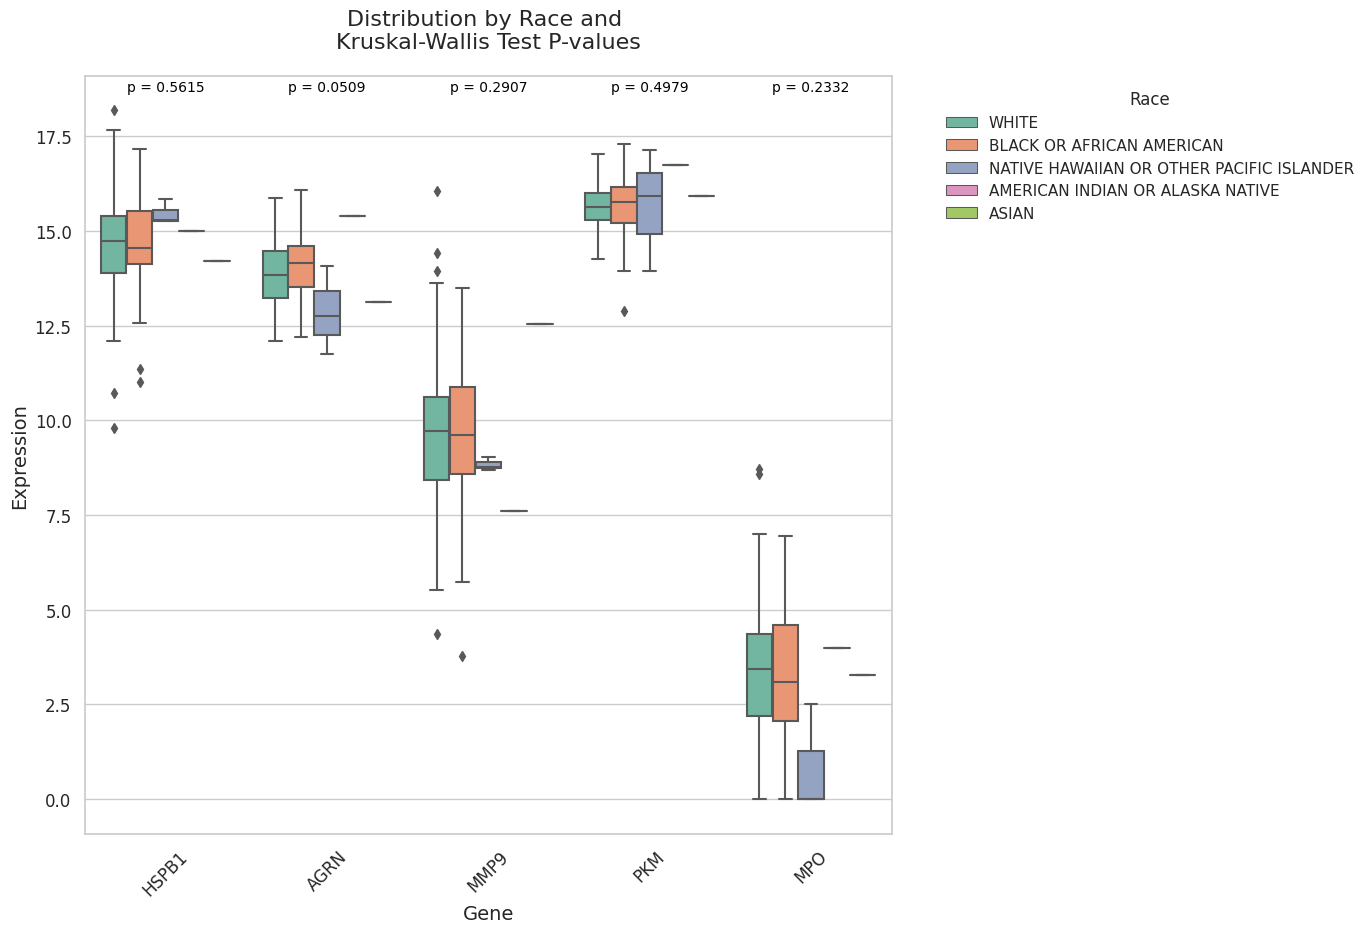

In [55]:
# Adjusting layout to move everything down and avoid title overlap with p-values
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create the plot
sns.boxplot(data=merged_data, x="gene", y="expression", hue="race", palette="Set2")

# Adding p-value annotations
for gene_idx, gene in enumerate(merged_data['gene'].unique()):
    if gene in p_values:
        plt.text(gene_idx, merged_data['expression'].max() + 0.5,
                 f"p = {p_values[gene]:.4f}",
                 horizontalalignment='center', fontsize=10, color="black")

# Adjusting plot aesthetics
plt.title("Distribution by Race and \nKruskal-Wallis Test P-values", fontsize=16, pad=20)
plt.xlabel("Gene", fontsize=14)
plt.ylabel("Expression", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rectangle to move plot contents down

plt.show()
